# Implicit FTBS Method to Solve PDE's with Mixed Differentials

In this notebook, you will learn the method used for numerically solving a mixed partial differential equation. An example of a mixed PDE looks like:

$$\frac{\partial ^{2}}{\partial x \partial y}$$

For this lesson, we will apply what we have learned to a conveyor belt equation. This equation describes the movement of a belt and is used to study the vibrations that arise. The belt vibrations can be classified into two categories: string (or wave)-like and beam-like. Here, we will assume that the belt is string-like. The equation to describe the movement of a string-like belt is:

$$\frac{\partial ^{2 } u}{\partial t^{2}}+2V\frac{\partial ^{2}u}{\partial t\partial x}+\left ( V^{2} -c^{2}\right )\frac{\partial ^{2}u}{\partial x^{2}}=0$$

$V$ is the time-varying speed of the conveyor belt and $c$ is the wave speed. In this case, we can assume $V$ is constant, or it does not vary with time. We can also assume that $c$ is constant.

# Discretization

Any kind of discretization can be used for this problem. Here we will discretize forwards in time and backwards in space (FTBS).

We can begin by discretizing the $\frac {\partial^{2}u}{\partial t^{2}}$ and $\frac {\partial^{2}u}{\partial x^{2}}$ terms using Euler's method just as we always have:

$$\frac {\partial_{2}u}{\partial t^{2}} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t^{2}}$$

$$\frac {\partial_{2}u}{\partial x^{2}} = \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x^{2}}$$

Now, we can move on to discretizing the mixed partial. First we will start by discretizing forward in time.

$$\frac {\partial u}{\partial t} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}$$

We can also rewrite the above equation as:

$$\frac {\partial u}{\partial t} = \frac{u_{i}^{n+1}}{\Delta t}-\frac{u_{i}^{n}}{\Delta t}$$

Next, we will discretize backwards in space for **each** time step. This can be confusing depending on the discretization method, so make sure to keep track of your $n$ and $i$ values. Notice that in one set, the time step $n+1$ stays the same while the space steps, $i$, change; the same is true for the other time step at $n$.

$$\frac{\partial^{2} u}{\partial t \partial x} = \frac{u_{i}^{n+1} - u_{i-1}^{n+1}}{\Delta t \Delta x} - \frac{u_{i}^{n} - u_{i-1}^{n}}{\Delta t \Delta x}$$ 

or

$$\frac{\partial^{2} u}{\partial t \partial x} = \frac{u_{i}^{n+1} - u_{i-1}^{n+1} - u_{i}^{n} + u_{i-1}^{n}}{\Delta t \Delta x}$$
 

We can also switch the discretization order and we should get the same thing. Let's check: 

$$\frac{\partial^{2} u}{\partial x \partial t} = \frac{u_{i}^{n+1} - u_{i}^{n} - u_{i-1}^{n+1} + u_{i-1}^{n}}{\Delta x \Delta t}$$

This is good, we get the same answer! Switching the order of partials should not make a difference, and in mathematics this theorem is called the equality of mixed partials.

This is the final form for the discretization of a second order mixed partial! Discretization can continually be applied for more mixed partials with higher orders.

# Implicit Method

Now that we have a discretization for each term, we can plug it all into our conveyor belt equation:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t^{2}} + 2V(\frac{u_{i}^{n+1} - u_{i-1}^{n+1} - u_{i}^{n} + u_{i-1}^{n}}{\Delta t \Delta x}) + (V^{2} -c^{2}) \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x^{2}} = 0 $$

Next, we'll move the knowns to the RHS and unknowns to the LHS:


$$-u_{i-1}^{n+1}\frac{2V}{\Delta t\Delta x} + u_{i}^{n+1}\left ( \frac{1}{\Delta t^{2}} + \frac{2V}{\Delta t\Delta x} \right )=
u_{i}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{i-1}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

Here we have two space terms that are at time step n+1. This indicates that we will need to use an implicit method to solve for the displacement of the conveyor belt, $u$!

This looks similar to what was done when we were first introduced to the implicit method, but now there are fewer n+1 terms. This is due to the fact that here we used forward time and backwards space, whereas previously we used forward time and centered space.

We can solve for a linear system using $[A][x] = [b]+[b_{BC}]$, where the LHS corresponds to $[A][x]$ and the RHS corresponds to $[b]+[b_{BC}]$. We can plug in values of $i$ to get an idea of what our matrices will look like. Remember to move knowns to the RHS and unknowns to the LHS.

$i=1$:

$$u_{1}^{n+1}\left ( \frac{1}{\Delta t^{2}}+\frac{2V}{\Delta t\Delta x} \right )=
u_{1}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{0}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})+u_{0}^{n+1}\frac{2V}{\Delta t\Delta x}$$

$i=2$:

$$-u_{1}^{n+1}\frac{2V}{\Delta t\Delta x}+u_{2}^{n+1}\left ( \frac{1}{\Delta t^{2}}+\frac{2V}{\Delta t\Delta x} \right )=
u_{2}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{1}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

$i=3$:

$$-u_{2}^{n+1}\frac{2V}{\Delta t\Delta x}+u_{3}^{n+1}\left ( \frac{1}{\Delta t^{2}}+\frac{2V}{\Delta t\Delta x} \right )=
u_{3}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{2}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

On the LHS we see that the matrix should have terms occupying the center diagonal and the lower diagonal. On the RHS we see that we have a difference between two $u$ terms.

# Boundary Conditions

We need to also account for the boundary conditions (BC). Let's set our BC so that at x = 0, L we have u = 0. We can also set our initial conditions (IC). We need two since our time variable is second order. Let's set them so that the initial displacement is 1 inch, and the initial velocity is 0.

Our BC give us:

$u_{0} =0$ for any time step

$u_{N} =0$ for any time step

and our IC give us:

$u_{i}^{0} = 1$ 

$u_{i}^{0} = u_{i}^{1}$


Since we have two Dirichlet BC, they will only appear on the RHS of our matrices. For our IC, we can simply set them up when initializing the $u$ array.

Now that we have our BC, we can apply them to the iterations that we did above to see what our equation looks like at $i = 1$ and $i = N$.

$i = 1$:

$$u_{1}^{n+1}\left ( \frac{1}{\Delta t^{2}}+\frac{2V}{\Delta t\Delta x} \right )=
u_{1}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{0}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})+u_{0}^{n+1}\frac{2V}{\Delta t\Delta x}$$

Apply $u_{0} = 0$ at all time steps

$$u_{1}^{n+1}\left ( \frac{1}{\Delta t^{2}}+\frac{2V}{\Delta t\Delta x} \right )=
u_{1}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

$i = N$:

$$-u_{N-1}^{n+1}\frac{2V}{\Delta t\Delta x} + u_{N}^{n+1}\left ( \frac{1}{\Delta t^{2}} + \frac{2V}{\Delta t\Delta x} \right )=
u_{N}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{N-1}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

Apply $u_{N} = 0$ at all time steps

$$u_{N-1}^{n+1}\frac{2V}{\Delta t\Delta x} = u_{N-1}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}})$$

Now let's set up our matrices using the format $[A][x] = [b]+[b_{BC}]$. 

$$\left[ \begin{array}{cccccc}
 (\frac{1}{\Delta t^{2}} + \frac {2V}{\Delta t \Delta x}) & 0 & 0 & \cdots & & 0 \\
 -\frac {2V}{\Delta t \Delta x} & (\frac{1}{\Delta t^{2}} + \frac {2V}{\Delta t \Delta x}) & 0 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & -\frac {2V}{\Delta t \Delta x} & (\frac{1}{\Delta t^{2}} + \frac {2V}{\Delta t \Delta x}) & 0 \\
 0 & \cdots & & & -\frac {2V}{\Delta t \Delta x} & (\frac{1}{\Delta t^{2}} + \frac {2V}{\Delta t \Delta x}) \end{array} \right]
  \cdot 
 \left[ \begin{array}{c} 
 u_1^{n+1} \\ u_2^{n+1} \\ \vdots \\ \\ u_{N}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
u_1^{n} (\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) \\ u_2^{n} (\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_1^{n} (\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) \\ \vdots \\ \\ u_{N}^{n}(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) - u_{N-1}^{n}(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) \end{array} \right]
 +
 \left [ \begin{array}{c}
 u_0^{n+1}\\ 0\\ \vdots\\ 0\\ 0 \end{array} \right]$$
 

For ease, lets give our constant terms a variable and apply our BC.

$$\frac {2V}{\Delta t \Delta x} = e$$

$$(\frac{1}{\Delta t^{2}} + \frac {2V}{\Delta t \Delta x}) = f$$

$$(\frac{1}{\Delta t ^{2}} + \frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) = g$$

$$(\frac{2V}{\Delta t \Delta x} + \frac{V^{2}-c^{2}}{\Delta x^{2}}) = h$$

Now our matrices are not so scary!

$$\left[ \begin{array}{cccccc}
 f & 0 & 0 & \cdots & & 0 \\
 -e & f & 0 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & -e & f & 0 \\
 0 & \cdots & & & -e & f \end{array} \right]
  \cdot 
 \left[ \begin{array}{c} 
 u_1^{n+1} \\ u_2^{n+1} \\ \vdots \\ \\ u_{N}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
u_1^{n} g \\ u_2^{n} g - u_1^{n} h \\ \vdots \\ \\ - u_{N-1}^{n}h \end{array} \right]
 +
 \left [ \begin{array}{c}
 0\\ 0\\ \vdots\\ 0\\ 0 \end{array} \right]$$
 
Now, you can choose to write your code by setting up your constants, e, f, g, and h, but I will continue writing out the whole thing just so that its very clear!

# Coding Time

Let's assume in this problem that V = 0.5 m/s, c = 0.05 m/s, and the total belt length to be L = 1 m. Now we can load our libraries and set up our initial conditions. Note that we are importing a linear solver that will be used to find the matrix A.

In [414]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from scipy.linalg import solve

In [447]:
L = 1.    #length of belt in [m]
V = 0.5    # time-varying belt speed, constant in this case, [m/s]
c = .05   #wave speed, [m/s]

nx = 51.    #number of space steps

dx = L/(nx-1)    #length of space step
dt = 0.0001    #lengt of time step

ui = numpy.ones(nx)    #intial u vector
ui[0] = 0    #BC at x = 0
ui[-1]= 0    #BC at x = L

Next, we can create functions to generate our $A$ and $b$ matrices.

In [416]:
def generateMatrix(nx, dt, dx, V):
    """ Computes the matrix, A, for the conveyor belt equation with Dirichlet BC at x = 0, L
    
    
    Parameters:
    ----------
    nx: int
        number of space steps
    dt: float
        length of time step
    dx: float
        length of space step
    V: float
        time-varying speed of belt
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for conveyor belt equation
    """
   
    # Setup the diagonal
    d = numpy.diag(numpy.ones(nx-1)*(1./dt**2 + 2*V/(dt*dx)))
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(nx-2)*-2*V/(dt*dx), -1)
    
    A = d  + ld
    
    return A

In [417]:
def generateRHS(u, dt, dx, V, c):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    u: array of float
        Displacement at current time step
    dt: float
        length of time step
    dx: float
        length of space step
    V: float
        time-carying belt speed
    c: float
        wave speed
    
    Returns:
    -------
    b: array of float
        Right-hand side of conveyor belt equation
    """
    b = numpy.zeros_like(u)
    
    b = (u[1:]*(1./dt**2 + 2*V/(dt*dx) + (V**2 - c**2)/dx**2)) - (u[0:-1]*(2*V/(dx*dt) + (V**2 - c**2)/dx**2))

    # Dirichlet BC
    b[0] += u[0]
    b[-1] += u[-1]
    
    return b

Finally, we can implement an implicit forward time, backward space discretization to find our displacement after nt time steps.

In [439]:
def implicit_ftbs(u, A, nt, dt, dx, V, c):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    u: array of float
        initial displacement
    A: 2D array of float
        Matrix with discretized conveyor belt equation
    nt: int
        number of time steps
    dt: float
        length of time step
    dx: float
        length of space step
    V:  float
        time-varying belt speed
    c:  float
        wave speed
   
    Returns:
    -------
    u: array of floats
        displacement after nt time steps
    """
    
    for t in range(1,nt):    #set range starting from 1 since IC states that at timestep 0 and 1, u is the same for each space step 
        un = u.copy()
        b = generateRHS(un, dt, dx, V, c)
        # Use numpy.linalg.solve
        u_interior = solve(A,b)
        u[1:] = u_interior

    return u

Now we can set our number of time steps and generate our $A$ matrix!

In [440]:
nt = 1000
A = generateMatrix(nx, dt, dx, V)
print(A)

[[  1.00500000e+08   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.00000000e+05   1.00500000e+08   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -5.00000000e+05   1.00500000e+08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00500000e+08
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -5.00000000e+05
    1.00500000e+08   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   -5.00000000e+05   1.00500000e+08]]


In [441]:
u = implicit_ftbs(ui.copy(), A, nt, dt, dx, V, c)

Now let's plot our displacement along the length of the belt.

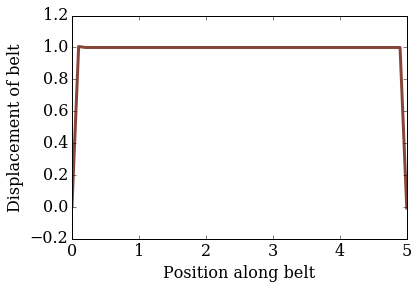

In [446]:
pyplot.plot(numpy.linspace(0,5,nx), u, color ='#874639', lw = 3)
pyplot.xlabel('Position along belt')
pyplot.ylabel('Displacement of belt');

We can see here that there is a slight overshoot at the beginning of the belt due to the initial displacement, but it quickly dampens out and remains at a constant displacement until the end of the belt, where it undershoots slightly.

You can also try different BC to see how the speed of the belt, the wave speed, and the length of the belt affect the intensity of the overshoot! You might find that the longer the belt, the less effect the IC seems to have downstream, and the faster the belt speed, the smaller the overshoot.

# Summary

Hopefully from this lesson you have learned or solidified your understanding of:

 - How to discretize a mixed partial differential
 - How and when to implement an implicit scheme
 - How to create the matrices needed to solve an implicit scheme
 
You can practice further by changing the discretization method to forward time and central space (or any other scheme), or by finding another equation with mixed partials and applying an implicit discretization as we did above!

# References

[1]Suweken, G., van Horssen, W.T., "On the Transversal Vibrations of a Conveyor Belt with a Low and Time-Varying Velocity," http://ta.twi.tudelft.nl/TWA_Reports/01/01-14new.pdf.

[2]Physics Forums, https://www.physicsforums.com/threads/very-difficult-partial-differential-equation.190777/.

[3]Eberly, David, Geometric Tools, LLC, "Derivative Approximation by Finite Difference," http://www.geometrictools.com/Documentation/FiniteDifferences.pdf.